# Funciones de distribucion de probabilidad

### Distribucion uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = np.random.uniform(1,100,2000)
data

2000

(array([196., 215., 186., 186., 194., 201., 208., 209., 201., 204.]),
 array([ 1.00944589, 10.902498  , 20.7955501 , 30.68860221, 40.58165432,
        50.47470643, 60.36775853, 70.26081064, 80.15386275, 90.04691486,
        99.93996696]),
 <a list of 10 Patch objects>)

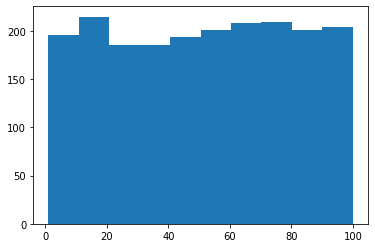

In [3]:
%matplotlib inline
plt.hist(data)

### Distribucion uniforme

In [4]:
mu=5.5
sd=2.5
data = mu + sd*np.random.randn(1000)
data

array([ 5.83594754,  5.75091334,  2.71611086,  9.36200968,  8.79244605,
        4.5796298 ,  5.53035572,  5.41664805,  6.97818773,  7.60430429,
       11.10847675,  6.73064413,  3.28063354,  7.94944546,  4.01492124,
        4.06348911,  6.0104353 ,  7.69446359,  4.61040732,  5.68148073,
        5.48804521,  8.67849966,  3.81721442,  8.80319939,  4.83036558,
        4.43625376,  2.53081296,  4.53193255,  5.58742119,  1.93974808,
        4.59717886,  4.58548903,  9.65560817,  5.36494844,  1.01505786,
        6.5208835 ,  0.29670864,  5.86337096, 10.22136892,  3.59423228,
        8.08035192,  5.22070578,  4.03019257,  7.10460398,  0.01611587,
        1.07618002,  2.47804866,  4.95698395, 10.21894295,  6.1689354 ,
        3.13746055,  7.50843344,  6.84138223,  7.22949424,  8.49818562,
        2.45011159,  2.95811498,  7.31800752,  9.67936247,  3.44620495,
        4.15466148,  5.78745691,  4.76050571,  4.43089686,  5.95962334,
        3.29083271,  8.70513444,  5.64349765,  6.3337557 ,  9.60

(array([  6.,  15.,  65., 210., 245., 218., 153.,  67.,  17.,   4.]),
 array([-2.92246991, -1.20992244,  0.50262504,  2.21517251,  3.92771998,
         5.64026745,  7.35281493,  9.0653624 , 10.77790987, 12.49045735,
        14.20300482]),
 <a list of 10 Patch objects>)

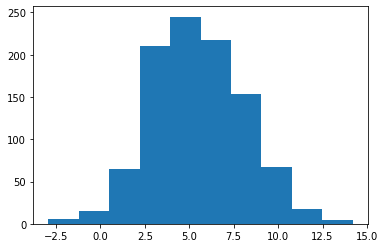

In [5]:
plt.hist(data)

In [6]:
datos = np.random.randn(2,4) # 2 muestras aleatorias de una normal de tamaño 4
datos

array([[ 0.07922776,  0.88549306,  0.69325057,  1.00294705],
       [-1.05653971,  2.08960821, -0.58103415,  0.25839745]])

### Simulacion de Monte-Carlo

* Generamos 2 numeros aleatorios  x,y entre 0,1*
 *calcularemos x*x+y*y *
 *si el valor es inferios a 1 -> estamos dentro del circulo*
 *si el valor es superior a 1 -> estamos fuera del circulo*
 *calculamos el numero total de veces que estan dentro del circulo y lo dividimos entre el numero* *total de intentos para obtener una aproximacion de la  probabilidad de caer dentro del circulo*
 *usamos dicha probabilidad para aproximar el valor de pi.*
 
 *repetimos el experimento un numero suficiente de veces (1000) para obtener 1000 aproximaciones* *diferentes de pi, el promedio de estos valores es la aproximacion de pi*

In [7]:
def pi_montecarlo(n,n_exp):
    pi_avg=0
    pi_value_list=[]
    for i in range(n_exp):
        value=0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()

        for j in range(n):
            z = np.sqrt(x[j]*x[j]+y[j]*y[j])
            if z <= 1:
                value +=1
        float_value = float(value)
        pi_value=float_value*4/n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
    pi=pi_avg/n_exp
    print(pi)
    fig=plt.plot(pi_value_list)
    return(pi,fig)

3.143613999999999


(3.143613999999999, [<matplotlib.lines.Line2D at 0x25a77ce5788>])

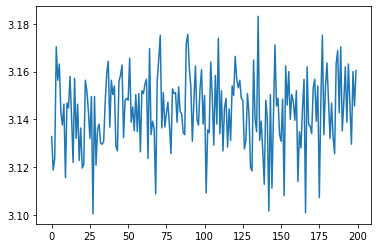

In [8]:
pi_montecarlo(10000,200)

### Dummy Data Sets

In [9]:
n = 100
data = pd.DataFrame(
    {
        'A': np.random.randn(n),
        'B': 1.5 + 2.5*np.random.randn(n),
        'C': np.random.uniform(5,32,n)
    }
)
data

,A,B,C
0,-1.079367,-2.745190,19.632152
1,0.900890,3.400224,24.894913
2,0.879022,1.036789,15.517420
3,-1.531238,3.241121,14.355335
4,0.260253,-2.225656,31.991125
...,...,...,...
95,0.374449,1.595345,18.026066
96,-0.786938,6.426577,8.643392
97,-1.736852,3.323553,24.873593
98,-1.194793,3.818679,30.373775


In [10]:
data.describe()

,A,B,C
count,100.000000,100.000000,100.000000
mean,-0.024797,1.772077,18.594008
std,1.022180,2.688684,7.826256
min,-2.369129,-3.872823,5.076780
25%,-0.779450,-0.273008,11.592540
50%,0.009592,2.000810,18.601052
75%,0.609061,3.718494,25.259356
max,2.609816,8.091774,31.991125


(array([ 1.,  6., 15., 19., 16., 18., 13.,  3.,  7.,  2.]),
 array([-2.36912937, -1.87123484, -1.3733403 , -0.87544577, -0.37755124,
         0.1203433 ,  0.61823783,  1.11613237,  1.6140269 ,  2.11192144,
         2.60981597]),
 <a list of 10 Patch objects>)

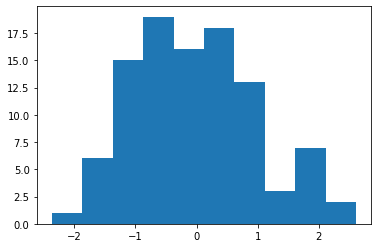

In [11]:
plt.hist(data['A'])

(array([ 7.,  7., 10., 11., 20., 16., 12., 11.,  5.,  1.]),
 array([-3.87282303, -2.67636337, -1.4799037 , -0.28344404,  0.91301562,
         2.10947528,  3.30593494,  4.50239461,  5.69885427,  6.89531393,
         8.09177359]),
 <a list of 10 Patch objects>)

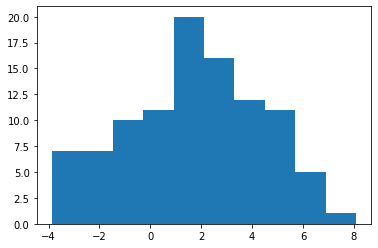

In [12]:
plt.hist(data['B'])

(array([ 8.,  8., 15.,  8., 10., 15.,  7.,  9.,  5., 15.]),
 array([ 5.07678033,  7.76821479, 10.45964925, 13.15108372, 15.84251818,
        18.53395264, 21.22538711, 23.91682157, 26.60825603, 29.2996905 ,
        31.99112496]),
 <a list of 10 Patch objects>)

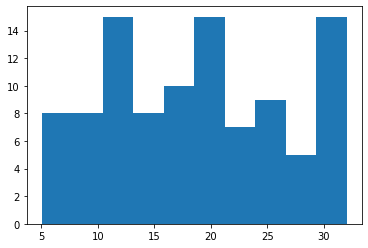

In [13]:
plt.hist(data['C'])

In [14]:
DATA= pd.read_csv(r"D:\Escritorio\python courses\Curso Completo de machine learning data science in python\python-ml-course-master\datasets\customer-churn-model\Customer Churn Model.txt")
DATA

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [15]:
column = data.columns.values.tolist()
column

['A', 'B', 'C']

In [16]:
A = len(column)
A

3

In [17]:
new_data = pd.DataFrame(
{
    'Column name': column,
    'A': np.random.randn(A),
    'B': np.random.uniform(0,1,A)
}, index=
)
new_data

SyntaxError: invalid syntax (<ipython-input-17-b3db59aaf92a>, line 7)